# AI generated Fruits and Real Fruits Classification and Prediction

In [2]:
import os, sys
from glob import glob
import joblib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from skimage.io import imread_collection
import matplotlib.image as map_img
from matplotlib.image import imread

In [5]:
sns.set()

In [6]:
#Environment has been setted

In [7]:
AI=glob(r"C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\AI\*")
Real=glob(r"C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\*")

C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\AI\green-apple-ohs-1.jpg
AI image data
Image shape:(2048, 2048, 3)


array([[[162, 156, 142],
        [170, 164, 150],
        [176, 170, 156],
        ...,
        [188, 162, 139],
        [188, 162, 139],
        [188, 162, 139]],

       [[169, 163, 149],
        [176, 170, 156],
        [182, 176, 162],
        ...,
        [190, 164, 141],
        [190, 164, 141],
        [190, 164, 141]],

       [[176, 170, 156],
        [182, 176, 162],
        [187, 181, 167],
        ...,
        [193, 167, 144],
        [193, 167, 144],
        [193, 167, 144]],

       ...,

       [[161, 140, 121],
        [161, 140, 121],
        [161, 140, 121],
        ...,
        [167, 150, 132],
        [165, 148, 130],
        [165, 148, 130]],

       [[160, 139, 120],
        [159, 138, 119],
        [159, 138, 121],
        ...,
        [166, 147, 130],
        [164, 145, 128],
        [164, 145, 128]],

       [[159, 138, 121],
        [158, 137, 120],
        [158, 137, 120],
        ...,
        [164, 145, 128],
        [163, 144, 127],
        [162, 143, 126]]

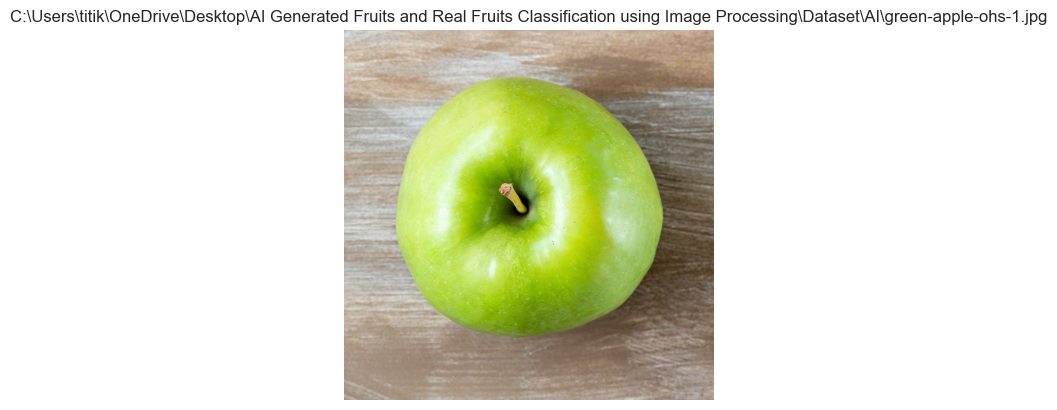

In [8]:
print(AI[0])
def view_image(directory):
    img=map_img.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img
print('AI image data')
view_image(AI[0])

C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\green-apple-ohs-1.jpg
Real image data
Image shape:(2240, 3984, 3)


array([[[137, 138, 133],
        [138, 139, 134],
        [138, 139, 134],
        ...,
        [129, 132, 125],
        [129, 132, 125],
        [129, 132, 125]],

       [[137, 138, 133],
        [138, 139, 134],
        [138, 139, 134],
        ...,
        [130, 133, 126],
        [130, 133, 126],
        [130, 133, 126]],

       [[137, 138, 133],
        [138, 139, 134],
        [138, 139, 134],
        ...,
        [130, 133, 126],
        [130, 133, 126],
        [130, 133, 126]],

       ...,

       [[ 15,  17,  16],
        [ 14,  16,  15],
        [ 12,  14,  13],
        ...,
        [107, 106, 101],
        [107, 106, 101],
        [107, 106, 101]],

       [[ 15,  17,  16],
        [ 14,  16,  15],
        [ 12,  14,  13],
        ...,
        [108, 107, 102],
        [108, 107, 102],
        [108, 107, 102]],

       [[ 15,  17,  16],
        [ 14,  16,  15],
        [ 12,  14,  13],
        ...,
        [109, 108, 103],
        [109, 108, 103],
        [109, 108, 103]]

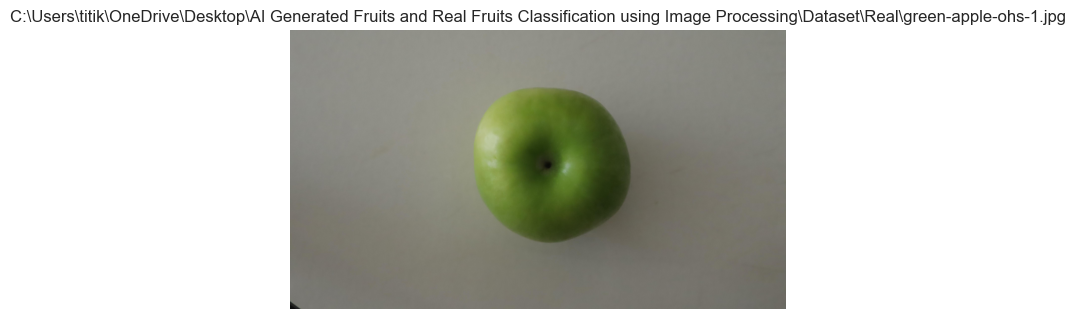

In [9]:
print(Real[0])
print('Real image data')
view_image(Real[0])

## Algorithms

### 1.) PCA

In [10]:
#normalizing pixel , resizing and reshaping
import matplotlib.image as mpimg
from skimage.transform import resize
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img/255.0
    img = resize(img,(128,128,3))
    img = np.reshape(img,(128,384))
    return img

In [11]:
AI = [extract_feature(filename) for filename in AI]
Real = [extract_feature(filename) for filename in Real]

In [13]:
data = np.concatenate((np.array(AI),np.array(Real)))

##### Done with image reshaping adn clubbing all stages of alz in one

In [14]:
data = data.reshape(data.shape[0], np.product(data.shape[1:]))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [16]:
#standardize to mean 0 and unit variance
x = scaler.transform(data)

In [131]:
from sklearn.model_selection import train_test_split
y = [0]*len(AI) + [1]*len(Real)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [18]:
from sklearn import decomposition, preprocessing, svm

scale = preprocessing.StandardScaler()
#Compressing the images into two dimensions using PCA
pca = decomposition.PCA(200)
X_proj = pca.fit_transform(x_train)


In [19]:
#let's first see which principal component works better
#scree plot but cumulative
# Getting the cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100 #100 is multiplied for percentage
 

In [22]:
#bb b  How many PCs explain 90% of the variance?
k = np.argmax(var_cumu>90)
print("Number of components explaining 80% variance: "+ str(k)) 
#print("\n")
 

Number of components explaining 80% variance: 39


[[ 2.41678635e+00 -1.83264175e+00 -7.41314122e+00 ...  6.44814345e-02
   1.56574359e-01 -2.21465952e-02]
 [ 3.70511165e+00 -5.26614626e+00 -9.06772969e+00 ... -2.66326137e-01
   1.39547385e-01  1.15144889e-01]
 [-2.59965302e+01 -9.16501122e+00  2.07219703e+00 ...  9.88431591e-03
   1.42507209e-02 -8.60543848e-03]
 ...
 [ 4.22951345e-02 -3.17706486e+00 -1.10569353e+01 ... -3.55173191e-01
   2.63791046e-01  2.01812276e-01]
 [-1.02095764e+00  2.76791600e+00 -2.13070547e+00 ... -1.59502529e-01
   8.03869981e-02 -3.38322717e-01]
 [ 8.89590040e-01 -1.75500417e+00 -5.40776980e+00 ...  3.16409468e-01
   4.72513624e-02  1.04504434e-01]]


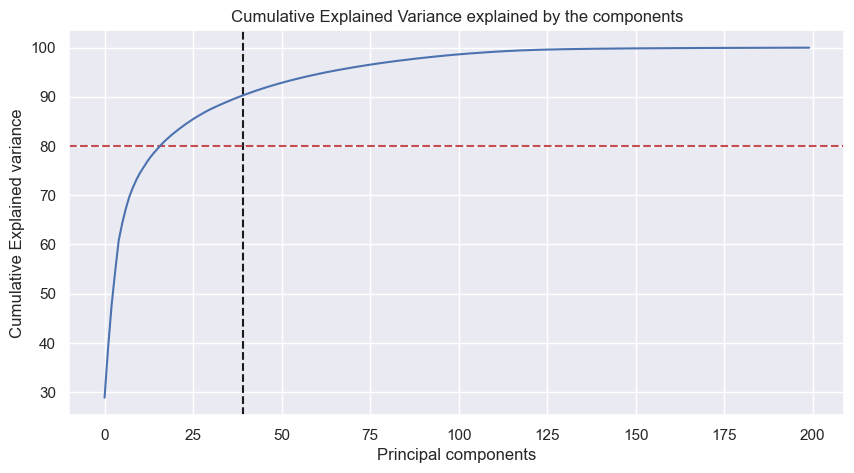

In [23]:
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=80, color="r", linestyle="--")
ax = plt.plot(var_cumu)

print(X_proj)

In [24]:
joblib.dump(scaler, "PCA_graph.model")

['PCA_graph.model']

In [25]:
load_scaler = joblib.load("PCA_graph.model")

### 2.) LDA Classification Accuracy

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_LDA = lda.fit_transform(x_train, y_train)
X_test_LDA = lda.transform(x_test)
accuracy = lda.score(x_test, y_test)
print(accuracy*100, '% accuracy (testing data)' )
accuracy_train = lda.score(x_train, y_train)
print(accuracy_train*100, '% accuracy (training data)')

91.80327868852459 % accuracy (testing data)
100.0 % accuracy (training data)


### 2.1) LDA Classification Prediction

Image
Image shape:(2240, 3984, 3)
Prediction: [1]


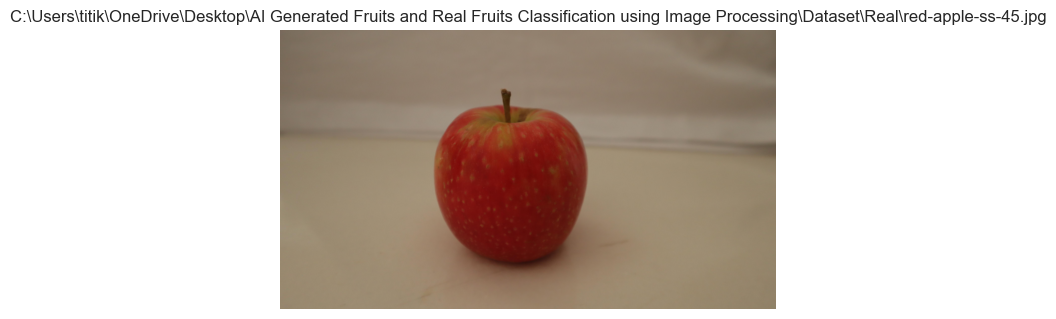

In [72]:
from glob import glob

user_input=glob(r"C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg")

def view_image(directory):
    img=map_img.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img
print('Image')
view_image(user_input[0])
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0
    img = resize(img, (128, 128, 3))
    img_flat = img.flatten()  # Flatten the 3D array into a 1D array
    return img_flat
user_input = [extract_feature(filename) for filename in user_input]

y_pred = lda.predict(user_input)
print('Prediction:',y_pred)
#AI_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\AI\green-apple-ss-20.jpg".............0
#Real_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg"

In [27]:
joblib.dump(lda, "lda_classification.model")

['lda_classification.model']

In [28]:
load_lda = joblib.load("lda_classification.model")

### 3.) SVM

In [29]:
# SVM for detection
#List where arrays shall be stored

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

In [43]:
resized_image_array_=[]
resized_image_array_label_=[]

In [44]:
# #Iterate over pictures and resize them to 256 by 256
from PIL import Image
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics
from time import sleep
def resizer(image_paths,label):
    for array_temp in image_paths: #tried with os.listdir but could work with os.walk as well
#         img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
#         #preserve aspect ratio
#         img = img.resize(new_size)
#         array_temp = np.array(img)
#         shape_new = width*height
        img_wide = array_temp.reshape(1,-1)
        resized_image_array_.append(img_wide[0])
        resized_image_array_label_.append(label)
    return resized_image_array_, resized_image_array_label_
resizer(AI, 0)
resizer(Real, 1)


([array([0.77454157, 0.77333284, 0.75317205, ..., 0.66759107, 0.60561117,
         0.54653053]),
  array([0.65168922, 0.56071588, 0.46005538, ..., 0.68322921, 0.59227031,
         0.48860707]),
  array([0.71645776, 0.70144465, 0.69881136, ..., 0.62025069, 0.57685592,
         0.53158189]),
  array([0.86753548, 0.86756938, 0.86706811, ..., 0.87716718, 0.87821847,
         0.88622908]),
  array([0.93862684, 0.93617531, 0.92915892, ..., 0.843895  , 0.84551287,
         0.84591574]),
  array([0.8147632 , 0.8147632 , 0.81476244, ..., 0.70360007, 0.70073432,
         0.69289345]),
  array([0.73987697, 0.65419253, 0.57602183, ..., 0.64974118, 0.5821086 ,
         0.5512262 ]),
  array([0.89535149, 0.89927229, 0.91504004, ..., 0.79650451, 0.7906054 ,
         0.77755901]),
  array([0.81009456, 0.79778319, 0.80025099, ..., 0.80873043, 0.81265124,
         0.82834016]),
  array([0.85296577, 0.81183014, 0.78379478, ..., 0.72723685, 0.68629278,
         0.66840039]),
  array([0.80053749, 0.7613363

In [48]:
print(len(resized_image_array_))

302


In [74]:
x_train, x_test, y_train, y_test = train_test_split(resized_image_array_ , resized_image_array_label_, test_size=0.2)

### 3.1) Linear Kernel Accuracy

In [60]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)
#store predictions and ground truth
y_pred = clf.predict(x_train)
y_true = y_train

#assess the performance of the SVM with linear kernel on Training data
print('Trainign Dataset:)')
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :\n', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf.predict(x_test)
y_true = y_test

#assess the performance of the SVM with linear kernel on Testing data
print('-------------------------------------------------------------------------------------------------------------------')
print('Testing Dataset:)')
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :\n', metrics.confusion_matrix(y_true, y_pred))

Trainign Dataset:)
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix :
 [[116   0]
 [  0 125]]
-------------------------------------------------------------------------------------------------------------------
Testing Dataset:)
Accuracy :  0.9836065573770492
Precision :  0.9666666666666667
Recall :  1.0
f1 :  0.983050847457627
Confusion matrix :
 [[31  1]
 [ 0 29]]


### 3.1.1) Linear kernel prediction

Image
Image shape:(2240, 3984, 3)
Prediction: [1]


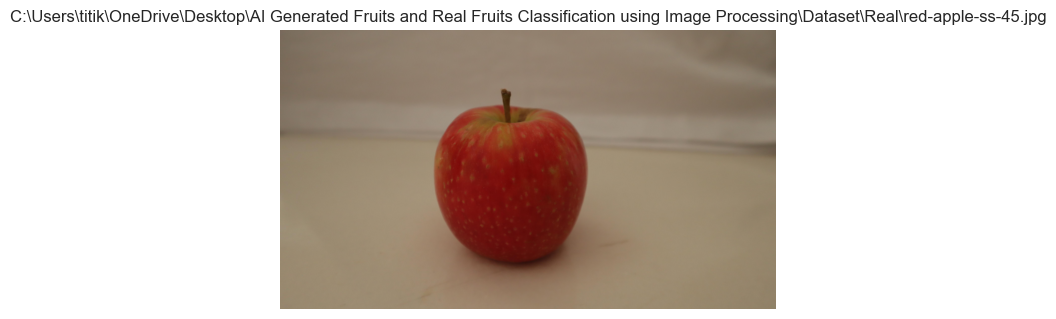

In [53]:
from glob import glob

user_input=glob(r"C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg")

def view_image(directory):
    img=map_img.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img
print('Image')
view_image(user_input[0])
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0
    img = resize(img, (128, 128, 3))
    img_flat = img.flatten()  # Flatten the 3D array into a 1D array
    return img_flat
user_input = [extract_feature(filename) for filename in user_input]

y_pred = clf.predict(user_input)
print('Prediction:',y_pred)
#AI_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\AI\green-apple-ss-20.jpg".............0
#Real_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg"

In [54]:
joblib.dump(clf, "clf_linear.model")

['clf_linear.model']

In [55]:
load_linear = joblib.load("clf_linear.model")

### 3.2) RBF Kernel Accuracy

In [61]:
#Train a SVM using RBF kernel
clf_r = svm.SVC(kernel = 'rbf')
clf_r.fit(x_train, y_train)

#store predictions and ground truth
y_pred = clf_r.predict(x_train)
y_true = y_train

#assess the performance of the SVM with linear kernel on Training data
print('Trainign Dataset:)')
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :\n', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf_r.predict(x_test)
y_true = y_test

#assess the performance of the SVM with linear kernel on Testing data
print('-------------------------------------------------------------------------------------------------------------------')
print('Testing Dataset:)')
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :\n', metrics.confusion_matrix(y_true, y_pred))

Trainign Dataset:)
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix :
 [[116   0]
 [  0 125]]
-------------------------------------------------------------------------------------------------------------------
Testing Dataset:)
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix :
 [[32  0]
 [ 0 29]]


### 3.2.1) RBF Kernel Prediction

Image
Image shape:(2240, 3984, 3)
Prediction: [1]


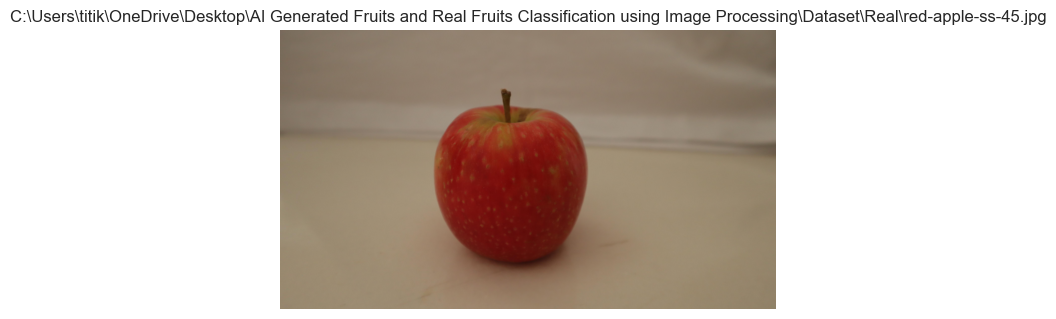

In [64]:
from glob import glob

user_input=glob(r"C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg")

def view_image(directory):
    img=map_img.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img
print('Image')
view_image(user_input[0])
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0
    img = resize(img, (128, 128, 3))
    img_flat = img.flatten()  # Flatten the 3D array into a 1D array
    return img_flat
user_input = [extract_feature(filename) for filename in user_input]

y_pred = clf_r.predict(user_input)
print('Prediction:',y_pred)
#AI_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\AI\green-apple-ss-20.jpg".............0
#Real_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg"

In [65]:
joblib.dump(clf_r, "clf_rbf.model")

['clf_rbf.model']

In [71]:
load_clfd = joblib.load("clf_rbf.model")

### 3.3) Poly Kernel Accuracy

In [67]:
#Train a SVM using polynomial kernel with degree of 2
clf_p = svm.SVC(kernel = 'poly', degree = 2)
clf_p.fit(x_train, y_train)

#store predictions and ground truth
y_pred = clf_p.predict(x_train)
y_true = y_train

#assess the performance of the SVM with linear kernel on Training data
print('Trainign Dataset:)')
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :\n', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

#Now, use the SVM model to predict Test data
y_pred = clf_p.predict(x_test)
y_true = y_test

#assess the performance of the SVM with linear kernel on Testing data
print('-------------------------------------------------------------------------------------------------------------------')
print('Testing Dataset:)')
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :\n', metrics.confusion_matrix(y_true, y_pred))

Trainign Dataset:)
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix :
 [[116   0]
 [  0 125]]
-------------------------------------------------------------------------------------------------------------------
Testing Dataset:)
Accuracy :  0.9836065573770492
Precision :  0.9666666666666667
Recall :  1.0
f1 :  0.983050847457627
Confusion matrix :
 [[31  1]
 [ 0 29]]


### 3.3.1) RBF Kernel Prediction

Image
Image shape:(2240, 3984, 3)
Prediction: [1]


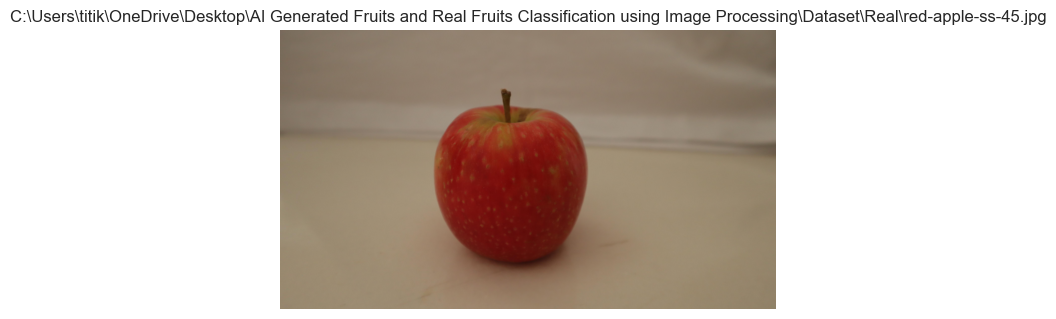

In [68]:
from glob import glob

user_input=glob(r"C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg")

def view_image(directory):
    img=map_img.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img
print('Image')
view_image(user_input[0])
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0
    img = resize(img, (128, 128, 3))
    img_flat = img.flatten()  # Flatten the 3D array into a 1D array
    return img_flat
user_input = [extract_feature(filename) for filename in user_input]


y_pred = clf_p.predict(user_input)
print('Prediction:',y_pred)
#AI_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\AI\green-apple-ss-20.jpg".............0
#Real_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg"

In [69]:
joblib.dump(clf_p, "clf_poly.model")

['clf_poly.model']

In [70]:
load_clfd1 = joblib.load("clf_poly.model")

### 4.) CNN (VGG16) 

In [76]:
import cv2

In [77]:
dim=(128,128)
def extract_feature(dir_path):
    img=mpimg.imread(dir_path)
    img=img/255.0
    img=resize(img,(128,128,3))
    img=np.reshape(img,(128,384))
    return img

In [133]:
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb
#now let's convert x_train data
rgb_list1 = []
for i in range(len(x_train)):
    rgb1 = to_rgb(x_train[i])
    rgb_list1.append(rgb1)
rgb_arr1 = np.stack([rgb_list1], axis=0)
rgb_arr_to_3d_train_x = np.squeeze(rgb_arr1, axis=0)
print(rgb_arr_to_3d_train_x.shape)

#now let's convert x_test data
rgb_list2=[]
for i in range(len(x_test)):
    rgb2 = to_rgb(x_test[i])
    rgb_list2.append(rgb2)
rgb_arr2 = np.stack([rgb_list2], axis=0)
rgb_arr_to_3d_test_x = np.squeeze(rgb_arr2, axis=0)
print(rgb_arr_to_3d_test_x.shape)

#now let's convert y_train data
rgb_list3=[]
for i in range(len(y_train)):
    rgb3=to_rgb(y_train[i])
    rgb_list3.append(rgb3)
rgb_arr3 = np.stack([rgb_list3],axis=0)
rgb_arr_to_3d_train_y = np.squeeze(rgb_arr3, axis=0)
print(rgb_arr_to_3d_train_y.shape)

#now let's convert y_test data
rgb_list4=[]
for i in range(len(y_test)):
    rgb4=to_rgb(y_test[i])
    rgb_list4.append(rgb4)
rgb_arr4=np.stack([rgb_list4],axis=0)
rgb_arr_to_3d_test_y = np.squeeze(rgb_arr4, axis=0)
print(rgb_arr_to_3d_test_y.shape)

(241, 128, 128, 3)
(61, 128, 128, 3)
(241, 128, 128, 3)
(61, 128, 128, 3)


In [79]:
import tensorflow as tf
from tensorflow.keras import layers
import random
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dropout, Dense, Flatten
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image

In [80]:
vgg16 = VGG16(weights='imagenet',input_shape=(128,128,3),include_top=False)
vgg16.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [81]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test, num_classes=2)
vgg16.trainable=False
final_model=Sequential()
final_model.add(vgg16)
final_model.add(Flatten(name='flatten'))
final_model.add(Dense(2,activation='softmax',name='predictions'))
final_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model=final_model.fit(rgb_arr_to_3d_test_y,y_test_one_hot,batch_size=7,epochs=10,verbose=1)


Epoch 1/10


9/9 [==============================] - 11s 808ms/step - loss: 0.6394 - accuracy: 0.7049
Epoch 2/10
9/9 [==============================] - 6s 700ms/step - loss: 0.1764 - accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 6s 696ms/step - loss: 0.0628 - accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 6s 663ms/step - loss: 0.0313 - accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 6s 617ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 6s 669ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 6s 687ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 8/10
9/9 [==============================] - 6s 668ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 9/10
9/9 [==============================] - 6s 677ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 10/10
9/9 [==============================] - 6s 625ms/step - loss: 0.0080 - accuracy: 1.0000


##### The loss is decreasing, indicating that the model is learning and improving its predictions over epochs. The accuracy is increasing and reaches 100%, which might indicate that the model is fitting the training data very well

### 4.1) VGG16 prediction

Image
Image shape:(2240, 3984, 3)
1/1 [==============================] - 1s 706ms/step
Prediction: [[0.9577095  0.04229047]]


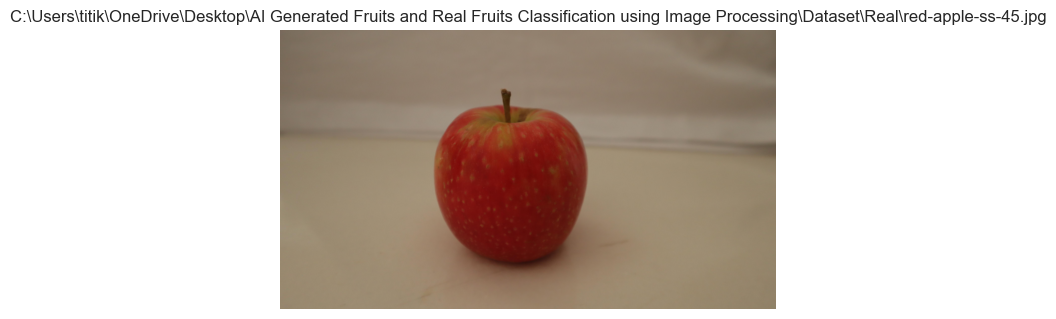

In [86]:
from glob import glob

user_input=glob(r"C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg")

def view_image(directory):
    img=map_img.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img
print('Image')
view_image(user_input[0])
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0
    img = resize(img, (128, 128, 3))
    img_flat = img.flatten()  # Flatten the 3D array into a 1D array
    return img_flat
user_input = [extract_feature(filename).reshape((128,128,3)) for filename in user_input]
user_input = [np.expand_dims(img,axis=0) for img in user_input]

y_pred = final_model.predict(user_input)
print('Prediction:',y_pred)
#AI_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\AI\green-apple-ss-20.jpg".............0
#Real_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg"

#### The output Prediction indicates that the model predicts the image to belong to the second class (Real Fruits) with a high probability of approximately 95.77%. The first element corresponds to the probability of the first class (AI Generated Fruits).

In [100]:
joblib.dump(scaler,"CNN_vgg16.model")
load_scaler=joblib.load("CNN_vgg16.model")

### 5.) ResNet CNN

In [127]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D


In [134]:
from keras.applications import ResNet50
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(128,128,3), include_top=False),
])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 64)          1179712   
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                      

In [135]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [136]:
y_train_one_hot = to_categorical(y_train, num_classes=2)
history = model.fit(rgb_arr_to_3d_train_y,
                    y_train_one_hot,
                    epochs=25,
                    verbose=1,
                    )

Epoch 1/25
8/8 [==============================] - 21s 1s/step - loss: 0.6270 - accuracy: 0.7220
Epoch 2/25
8/8 [==============================] - 10s 1s/step - loss: 0.3932 - accuracy: 0.9668
Epoch 3/25
8/8 [==============================] - 12s 2s/step - loss: 0.2253 - accuracy: 0.9959
Epoch 4/25
8/8 [==============================] - 14s 2s/step - loss: 0.1219 - accuracy: 1.0000
Epoch 5/25
8/8 [==============================] - 14s 2s/step - loss: 0.0525 - accuracy: 1.0000
Epoch 6/25
8/8 [==============================] - 15s 2s/step - loss: 0.0315 - accuracy: 1.0000
Epoch 7/25
8/8 [==============================] - 13s 2s/step - loss: 0.0252 - accuracy: 1.0000
Epoch 8/25
8/8 [==============================] - 13s 2s/step - loss: 0.0116 - accuracy: 1.0000
Epoch 9/25
8/8 [==============================] - 12s 2s/step - loss: 0.0102 - accuracy: 1.0000
Epoch 10/25
8/8 [==============================] - 12s 2s/step - loss: 0.0100 - accuracy: 1.0000
Epoch 11/25
8/8 [======================

### 5.1) ResNet Model Prediction

Image
Image shape:(2240, 3984, 3)
1/1 [==============================] - 2s 2s/step
Prediction: [[9.9999988e-01 1.2195369e-07]]


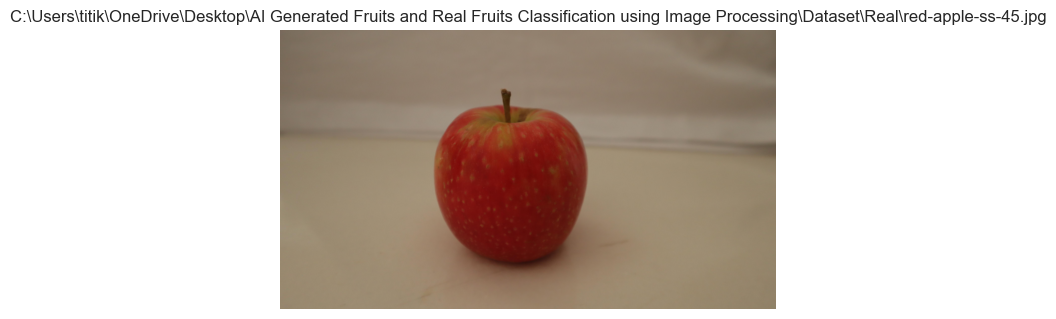

In [137]:
from glob import glob

user_input=glob(r"C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg")

def view_image(directory):
    img=map_img.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img
print('Image')
view_image(user_input[0])
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0
    img = resize(img, (128, 128, 3))
    img_flat = img.flatten()  # Flatten the 3D array into a 1D array
    return img_flat
user_input = [extract_feature(filename).reshape((128,128,3)) for filename in user_input]
user_input = [np.expand_dims(img,axis=0) for img in user_input]

y_pred = model.predict(user_input)
print('Prediction:',y_pred)
#AI_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\AI\green-apple-ss-20.jpg".............0
#Real_ "C:\Users\titik\OneDrive\Desktop\AI Generated Fruits and Real Fruits Classification using Image Processing\Dataset\Real\red-apple-ss-45.jpg"

#### The output Prediction indicates that the model predicts the image to belong to the second class (Real Fruits) with a high probability of approximately 99.99%. The first element corresponds to the probability of the first class (AI Generated Fruits).

## Model Accuracy
##### LDA: 91.3%
##### SVM(Linear): 98.39%
##### SVM(Poly): 98.39%
##### SVM(RBF): 100%
##### CNN(vgg16): 77.85 to 100%
##### CNN(ResNet): 65.15 to 100%